In [50]:
import MySQLdb
import pandas as pd
import matplotlib as plt
import seaborn as sns
sns.set()

In [2]:
con = MySQLdb.connect(host='relational.fit.cvut.cz', user='guest', passwd='relational', db='imdb_ijs', port=3306 )
cur = con.cursor()

## Exploração e Seleção dos Dados

In [3]:
# Atores e filmes ao qual atuaram
atores = cur.execute("select roles.movie_id, concat(actors.first_name, ' ' ,actors.last_name)  from actors inner join roles on roles.actor_id = actors.id order by roles.movie_id;")
atores = pd.DataFrame(cur.fetchall(), columns=['movie_id', 'atores'])
atores = atores.groupby('movie_id').agg(lambda x: x.tolist())

In [4]:
# Diretores e os filmes produzidos
diretores = cur.execute("select movies.id, concat(directors.first_name, ' ' ,directors.last_name)  from movies inner join movies_directors mg on mg.movie_id = movies.id inner join directors on mg.director_id = directors.id;")
diretores = pd.DataFrame(cur.fetchall(), columns=['movie_id','diretores'])
diretores = diretores.groupby('movie_id').agg(lambda x: x.tolist())

In [5]:
# Filmes e os respectivos generos
generos = cur.execute("SELECT movies.id, movies.year, (SELECT  GROUP_CONCAT(genre SEPARATOR ', ') FROM imdb_ijs.movies_genres mvg WHERE mvg.movie_id = movies.id) AS Generos, movies.rank AS Imdb FROM movies where (movies.rank is not null) ORDER BY movies.id;")
generos = pd.DataFrame(cur.fetchall(), columns=['movie_id','ano','genero', 'rating'])
generos = generos.groupby('movie_id').agg(lambda x: x.tolist())

In [6]:
import ast

edit = generos['genero'].astype(str)
edit = edit.map(lambda x: x.replace(',', '\',\'').replace(' ', ''))
edit = pd.DataFrame(edit)
edit = edit.genero.apply(lambda x: list(ast.literal_eval(x)))

all_genders = pd.get_dummies(edit.apply(pd.Series).stack()).sum(level=0)

#### Tratando dados Nulos

In [7]:
generos = generos.dropna()
atores = atores.dropna()
diretores = diretores.dropna()

In [8]:
test = pd.merge(diretores, atores, on='movie_id')
test = test.groupby('movie_id').agg(lambda x: x.tolist())
test = pd.merge(test, generos, on='movie_id')
test = test.groupby('movie_id').agg(lambda x: x.tolist())

In [9]:
#print(test)

In [10]:
movies_scores = test.dropna()
aux = movies_scores
aux = aux.dropna()

dt = aux.drop(['diretores', 'atores', 'genero'], axis = 1)
#print(dt)

In [11]:
dt.rating = dt.rating.astype(str)
dt.ano = dt.ano.astype(str)
dt.rating = dt.rating.map(lambda x: x.lstrip('[').rstrip(']'))
dt.ano = dt.ano.map(lambda x: x.lstrip('[').rstrip(']'))

dt = pd.merge(dt, all_genders, on='movie_id')
save_dt = dt.dropna()


In [12]:
dt

,ano,rating,Action,Adult,Adventure,Animation,Comedy,Crime,Documentary,Drama,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Thriller,War,Western
movie_id,,,,,,,,,,,,,,,,,,,,,
2,1971,6.4,0,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,1971,5.0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11,1939,6.7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15,1999,7.5,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
18,1996,9.6,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378550,2000,7.0,0,0,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
378558,1989,6.9,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
378583,2001,8.7,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:

pldt = save_dt

pldt.Action = pldt.Action * 1.1
pldt.Adventure = pldt.Adventure * 2.2
pldt.Animation = pldt.Animation * 3.3
pldt.Comedy = pldt.Comedy * 4.4
pldt.Crime = pldt.Crime * 5.5
pldt.Documentary = pldt.Documentary * 6.6
pldt.Drama = pldt.Drama * 7.7
pldt.Horror = pldt.Horror * 8.8
pldt.Music = pldt.Music * 9.9
pldt.Musical = pldt.Musical * 10.0
pldt.Mystery = pldt.Mystery * 11.1
pldt.Romance = pldt.Romance * 12.2
pldt['Sci-Fi'] = pldt['Sci-Fi'] * 13.3
pldt.Short = pldt.Short * 14.4
pldt.Thriller = pldt.Thriller * 15.5
pldt.War = pldt.War * 16.6
pldt.Western = pldt.Western * 17.7
pldt.Family = pldt.Family * 2.8
pldt.Fantasy = pldt.Fantasy * 2.9
pldt['Film-Noir'] = pldt['Film-Noir'] * 3.0


<AxesSubplot:ylabel='Frequency'>

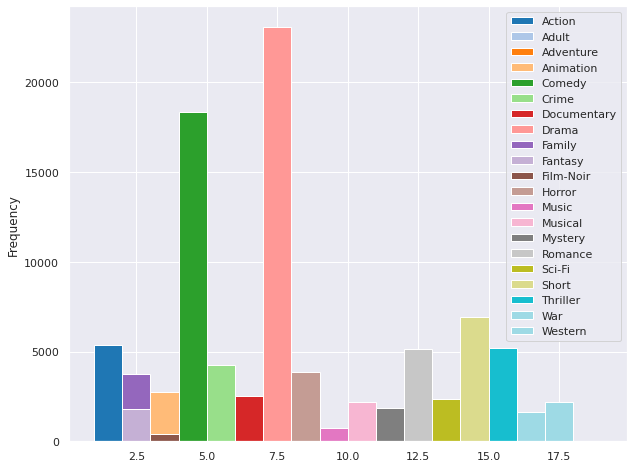

In [58]:
import numpy as np
#pd.DataFrame.hist(dt, figsize = [15,15], bins=np.arange(0.5,1.6,0.2));
pldt.plot(kind='hist', bins=np.arange(1,20,1), figsize = [10,8], cmap='tab20')




## Adicionando Diretores

In [15]:
from sklearn import metrics

diretores = cur.execute("select movies.id, concat(directors.first_name, ' ' ,directors.last_name)  from movies inner join movies_directors mg on mg.movie_id = movies.id inner join directors on mg.director_id = directors.id;")
diretores = pd.DataFrame(cur.fetchall(), columns=['movie_id','diretores'])
new_diretores = pd.merge(dt, diretores, on='movie_id')
new_diretores = new_diretores.set_index('movie_id')
new_diretores['diretores'] = new_diretores['diretores'].astype('category')

new_diretores['diretores'] = new_diretores['diretores'].cat.codes 
new_diretores = new_diretores.dropna() 

#new_diretores['diretores'] = new_diretores['diretores'].cat.codes 


In [16]:
#print(new_diretores)

In [27]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(new_diretores.drop(['rating'], axis=1),new_diretores.rating,random_state=0,test_size=0.40)
print (X_train.shape) 
print (y_train.shape) 
print (X_test.shape) 
print (y_test.shape)


## Convertendo para números reais
X_train = X_train.astype(float)
X_test = X_test.astype(float)
y_train = y_train.astype(float)
y_test = y_test.astype(float)

(36376, 22)
(36376,)
(24252, 22)
(24252,)


In [18]:
#print(X_train)

## Dimensionando a escala dos dados

In [28]:
from sklearn.preprocessing import StandardScaler

scalerX = StandardScaler().fit(X_train)

X_train = scalerX.transform(scalerX.transform(X_train))
X_test = scalerX.transform(scalerX.transform(X_test))


In [29]:
from sklearn.tree import DecisionTreeRegressor

train = X_train
train_labels = y_train
test = X_test
test_labels = y_test


In [30]:
from sklearn.model_selection import cross_val_score

decision_tree = DecisionTreeRegressor(random_state = 0)
decision_tree.fit(train, train_labels)
Y_pred = decision_tree.predict(test)
cross_val_score(decision_tree, test, test_labels, cv=10)
print(Y_pred)

[6.80625    3.9        6.94090909 ... 4.73333333 4.4        6.43125   ]


In [45]:
pred= Y_pred

h=pd.DataFrame(pred)
h=h.round(1)
g=pd.DataFrame(test_labels)
g=g.reset_index(drop=True)
h['rating']=g
h.columns=['pred','actual']
h['difference']=round(abs(h.pred-h.actual),2)
h = h.dropna()
h.sample(4)


,pred,actual,difference
19721,6.0,7.0,1.0
13709,6.8,7.2,0.4
8893,5.8,6.2,0.4
23384,6.4,6.6,0.2


In [48]:
print("Predictions within +/-1.1 star: %f"%((h.difference<1.1).sum()))
print('Total Predictions:              %f'%(h.difference).count())
print ('Accuracy for Linear Regression: %f'%(((h.difference<1.1).sum())/(h.difference.count())))
print()

Predictions within +/-1.1 star: 13415.000000
Total Predictions:              24252.000000
Accuracy for Linear Regression: 0.553150



In [49]:
round(h.difference.mean(),4)

1.1702